**Estudiantes:** Valentina Duarte Cardona y Ana María Arcila Ortiz

## Campo eléctrico 
1. Elaborar un programa para calcular el campo eléctrico producido por un dipolo eléctrico, realizar una representación del campo para todo el dominio 
elegido para calcular el campo. Para encontrar el campo, se sugiere hacer lo siguiente:

- a. Encontrar el campo en un punto producido por dos cargas q1 y q2
- b. Emplee el comando  plt.quiver(x, y, Ex, Ey) para mostrar el campo producido por q1 y q2. Puedes intentarlo con el comando, plt.stremplot.
- c. Generalice el problema para varios puntos en el espacio.

Se recomienda emplear numpy array. 

## Movimiento parabólico.
2. Un jugador de baloncesto desea saber si encestará su tiro dependiendo de la velocidad inicial, ángulo de lanzamiento y posición respecto a la canasta. 

Elabore un programa en el que dada una distancia, velocidad inicial y  ángulo, determine si hay cesta. El modelo será bajo partícula, sin la rotación del balón. 

Se recomienda emplear numpy array. 



#Desarrollo 1:
###En el siguiente código se muestran las interacciones entre cargas en el espacio. 
######Para agregar o quitar la carga número n, se debe insertar en el diccionario r_source (separado de las otras por una coma) como "qn": np.array([xn,yn]) y se debe insertar la magnitud de la carga qn en el array q de la siguiente manera: q=np.array([q1,q2,...,qn]).

<Figure size 432x288 with 0 Axes>

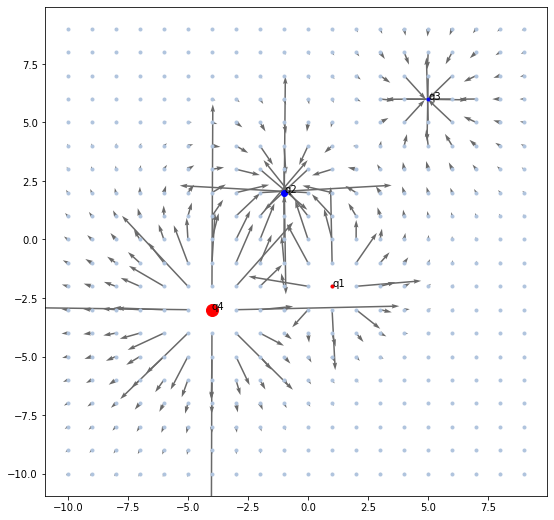

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

k=8.99e9
def magnitud(q, r):
    global k
    if r!=0:
      return k*q/r**2
    else:
      return 0

r_source={"q1": np.array([1.,-2.]),"q2": np.array([-1.,2.]),"q3": np.array([5.,6.]),"q4": np.array([-4,-3])} #posicion de las cargas
q=np.array([1,-2,-1,4]) #magnitud de las cargas

def E_c(r_source,rp,n):
    Delta_R=rp-r_source
    MagDelta_R=np.sqrt(Delta_R[0]**2+Delta_R[1]**2)
    if MagDelta_R!=0:
      u_R=Delta_R/MagDelta_R
      E=magnitud(q[n],MagDelta_R)*u_R
      return E[0], E[1]

X=np.arange(-10,10)
n1=len(X)
Y=np.arange(-10,10)
n2=len(Y)
rp=np.zeros((n1*n2,2))
c=0
for X_ in X:
    for Y_ in Y:
        rp[c]=np.array([X_,Y_])
        c+=1

E=np.zeros((n1*n2,2))
E2=np.zeros((n1*n2,2))
for s in range(0,len(r_source)):
    for i in range(0,len(rp)):
        E2[i]=E_c(r_source[str(list(r_source.keys())[s])],rp[i],s)
        E+=E2  

h=[row for row in zip(*r_source.values())]

plt.figure()
plt.figure(figsize=(9, 9))
plt.plot(rp[:,0],rp[:,1],'o',markersize=3,color="lightsteelblue")
for n in range(0,len(q)):
    plt.text(h[0][n],h[1][n],str(list(r_source.keys())[n]),color="black")
    if q[n]<0:
        plt.plot(h[0][n],h[1][n],'ro',markersize=(3*abs(q[n])),color="blue")
    else:
        plt.plot(h[0][n],h[1][n],'ro',markersize=(3*abs(q[n])),color="red")
plt.quiver(rp[:,0],rp[:,1],E[:,0],E[:,1], color="dimgray")
plt.show()

#Desarrollo 2:
###El siguiente código muestra la trayectoria de una pelota cuando se tira a una velocidad inicial, ángulo y distancia determinadas. Responde la pregunta de si, al tirar la pelota con estas condiciones, se logra encestar. En el caso de ser exitoso en el intento, dice SCORE, en caso de que no, dice fail.
######Condiciones en las que se asegura encestar: velocidad inicial: 11.5 m/s, ángulo: 45°, distancia: 10 m.

In [6]:
import numpy as np
import matplotlib.pyplot as plt


hc=3 #metros
dc=0.4572 #metros
vo=float(input("Ingrese la velocidad inicial deseada en metros/segundos:\n")) #m/s
theta=float(input("Ingrese el angulo de tiro en grados:\n")) #grados
xo=float(input("Ingrese la distancia del tirador hasta el palo de la cesta en metros:\n")) #metros
g=9.81 #m/s^2

a1=vo*np.sin(theta)
a2=vo**2
a3=np.sin(theta)**2
a4=2*g*hc
a5=np.sqrt((a2*a3)-a4)
t=(a1+a5)/g
xf=vo*np.cos(theta)*t

if xo-dc<xf<xo:
    p='SCORE!'
else:
    p='fail'

def f(d):
    b1=d*np.tan(theta)
    b2=(g*d**2)
    b3=2*(vo**2)*(np.cos(theta)**2)
    return b1-(b2/b3)
X=np.linspace(0,20,41)
Y=f(X)

plt.figure(figsize=(10, 5), dpi=80)
plt.plot(X,Y)
plt.plot(xf,hc,'ro')
plt.text(xf, hc, p, size=20)
plt.plot([xo,xo],[0,hc])
plt.plot([xo-dc,xo],[hc,hc])
plt.axhline(y=0)
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

Ingrese la velocidad inicial deseada en metros/segundos:
 200
Ingrese el angulo de tiro en grados:
 45
Ingrese la distancia del tirador hasta el palo de la cesta en metros:
 9


ValueError: Image size of 113027x339 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x400 with 1 Axes>